In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.neighbors import KNeighborsClassifier
import cmath 
import numpy as geek
import cmath, math, numpy

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [6]:
file = open("TrainData.pkl", 'rb')
Xd = pickle.load(file, encoding = 'bytes')
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1, 0])
X = [] 
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod, snr)])
        for i in range(Xd[(mod, snr)].shape[0]):  lbl.append((mod))#lbl.append((mod, snr))
X = np.vstack(X)
file.close()

In [7]:
len(X)

220000

In [8]:
features        = {}
features['raw'] = X[:, 0], X[:, 1]

In [9]:
Data = []

for i in range(len(lbl)):
    Data.append([lbl[i], X[i]])

In [10]:
df = pd.DataFrame(Data, columns=["lbl", "IQs"])
#df["lbl"][0]#change iqs or lbl to detect the label or array

In [11]:
x=Data[20000:140000]
y=Data[180000:220000]
z=x+y

In [12]:
a=lbl[20000:140000]
n=lbl[180000:220000]
s=(a+n)

In [13]:
len(s)

160000

In [14]:
s[120000]

b'QPSK'

In [15]:
#df

In [16]:
#Data2=df.drop(df.index[0:20000])    #to drop the data in range

In [17]:
#Data2

In [18]:
#Data3=Data2.drop(Data2.index[140000:180000])    #final data -40000 of the original data

In [19]:
#Data3

In [20]:
#Data3.shape

In [21]:
#len(Data3)

In [22]:
Mean1 = []
Std1 = []
Max1 = []
Min1 = []
Median1 = []
Var1 = []
Abs1 = []
Amp1=[]


Mean2 = []
Std2 = []
Max2 = []
Min2 = []
Median2 = []
Var2 = []
Abs2 = []
Amp2=[]

for idx in range(len(z)):
    [_, [r, i]] = z[idx]
    phi=np.arctan(i//r) #phi = tan inverse (imaginary / real)
    amp=np.abs(r + 1j*i)
   

    Mean1.append(np.mean(phi))
    Max1.append(np.max(phi))
    Min1.append(np.min(phi))
    Std1.append(np.std(phi))
    Median1.append(np.median(phi))
    Var1.append(np.var(phi))
    Abs1.append(np.mean(np.abs(phi)))
    
    Mean2.append(np.mean(amp))
    Max2.append(np.max(amp))
    Min2.append(np.min(amp))
    Std2.append(np.std(amp))
    Median2.append(np.median(amp))
    Var2.append(np.var(amp))
    Abs2.append(np.mean(np.abs(amp)))

In [23]:
len(Mean1)

160000

In [24]:
Features = np.c_[Mean1, Std1, Max1, Min1, Median1, Var1, Abs1,Mean2, Std2, Max2, Min2, Median2, Var2, Abs2,]

In [25]:
len(Features)

160000

In [22]:
SNR1= Features[0:1000]
SNR2=Features[20000:21000]
SNR3=Features[40000:41000]
SNR4=Features[60000:61000]
SNR5=Features[80000:81000]
SNR6=Features[100000:101000]
SNR7=Features[120000:121000]
SNR8=Features[140000:141000]
#SNR9=Features[160000:161000]
#SNR10=Features[180000:181000]
#SNR11=Features[200000:201000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [23]:
SNR1

array([[-2.1327798e-01,  8.9936739e-01,  1.5683025e+00, ...,
         7.0684627e-03,  1.7165570e-05,  7.8125000e-03],
       [-1.0950999e-01,  9.9047166e-01,  1.5526165e+00, ...,
         7.1438355e-03,  1.7013048e-05,  7.8125000e-03],
       [-1.5349579e-01,  9.6834219e-01,  1.5083776e+00, ...,
         7.4728839e-03,  1.3524331e-05,  7.8124995e-03],
       ...,
       [-2.5115395e-01,  8.7196767e-01,  1.5522799e+00, ...,
         7.4630631e-03,  1.6928132e-05,  7.8125000e-03],
       [-2.3518172e-01,  8.4584874e-01,  1.5631629e+00, ...,
         7.2624623e-03,  1.7424922e-05,  7.8124995e-03],
       [-3.0275542e-01,  8.5718435e-01,  1.5083776e+00, ...,
         7.6798452e-03,  1.3532626e-05,  7.8125000e-03]], dtype=float32)

In [24]:
len(SNR),SNR.shape

(8000, (8000, 14))

In [25]:
lbl1= s[0:1000]
lbl2=s[20000:21000]
lbl3=s[40000:41000]
lbl4=s[60000:61000]
lbl5=s[80000:81000]
lbl6=s[100000:101000]
lbl7=s[120000:121000]
lbl8=s[140000:141000]
#lbl9=lbl[160000:161000]
#lbl10=lbl[180000:181000]
#lbl11=lbl[200000:201000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [26]:
len(lbl),lbl.shape

(8000, (8000,))

In [27]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [28]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1225


In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro')) 
                                          

Precision: 0.06682865127521616
Recall: 0.1225


In [33]:
SNR1= Features[1000:2000]
SNR2=Features[21000:22000]
SNR3=Features[41000:42000]
SNR4=Features[61000:62000]
SNR5=Features[81000:82000]
SNR6=Features[101000:102000]
SNR7=Features[121000:122000]
SNR8=Features[141000:142000]
#SNR9=Features[161000:162000]
#SNR10=Features[181000:182000]
#SNR11=Features[201000:202000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [34]:
lbl1= s[1000:2000]
lbl2=s[21000:22000]
lbl3=s[41000:42000]
lbl4=s[61000:62000]
lbl5=s[81000:82000]
lbl6=s[101000:102000]
lbl7=s[121000:122000]
lbl8=s[141000:142000]
#lbl9=s[161000:162000]
#lbl10=s[181000:182000]
#lbl11=s[201000:202000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [35]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [36]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.11125


In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.06614067728053535
Recall: 0.11125


In [41]:
SNR1= Features[2000:3000]
SNR2=Features[22000:23000]
SNR3=Features[42000:43000]
SNR4=Features[62000:63000]
SNR5=Features[82000:83000]
SNR6=Features[102000:103000]
SNR7=Features[122000:123000]
SNR8=Features[142000:143000]
#SNR9=Features[162000:163000]
#SNR10=Features[182000:183000]
#SNR11=Features[202000:203000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [42]:
lbl1= s[2000:3000]
lbl2=s[22000:23000]
lbl3=s[42000:43000]
lbl4=s[62000:63000]
lbl5=s[82000:83000]
lbl6=s[102000:103000]
lbl7=s[122000:123000]
lbl8=s[142000:143000]
#lbl9=lbl[162000:163000]
#lbl10=lbl[182000:183000]
#lbl11=lbl[202000:203000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [43]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [44]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.11375


In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.1047236724147023
Recall: 0.11375000000000002


In [48]:
SNR1= Features[3000:4000]
SNR2=Features[23000:24000]
SNR3=Features[43000:44000]
SNR4=Features[63000:64000]
SNR5=Features[83000:84000]
SNR6=Features[103000:104000]
SNR7=Features[123000:124000]
SNR8=Features[143000:144000]
#SNR9=Features[163000:164000]
#SNR10=Features[183000:184000]
#SNR11=Features[203000:204000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [49]:
lbl1= s[3000:4000]
lbl2=s[23000:24000]
lbl3=s[43000:44000]
lbl4=s[63000:64000]
lbl5=s[83000:84000]
lbl6=s[103000:104000]
lbl7=s[123000:124000]
lbl8=s[143000:144000]
#lbl9=lbl[163000:164000]
#lbl10=lbl[183000:184000]
#lbl11=lbl[203000:204000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [50]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [51]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.14


In [54]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.09959823418003565
Recall: 0.14


In [55]:
SNR1= Features[4000:5000]
SNR2=Features[24000:25000]
SNR3=Features[44000:45000]
SNR4=Features[64000:65000]
SNR5=Features[84000:85000]
SNR6=Features[104000:105000]
SNR7=Features[124000:125000]
SNR8=Features[144000:145000]
#SNR9=Features[164000:165000]
#SNR10=Features[184000:185000]
#SNR11=Features[204000:205000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [56]:
lbl1= s[4000:5000]
lbl2=s[24000:25000]
lbl3=s[44000:45000]
lbl4=s[64000:65000]
lbl5=s[84000:85000]
lbl6=s[104000:105000]
lbl7=s[124000:125000]
lbl8=s[144000:145000]
#lbl9=s[164000:165000]
#lbl10=s[184000:185000]
#lbl11=s[204000:205000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [57]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [58]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [59]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.14875


In [61]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.12776136601717997
Recall: 0.14875


In [62]:
SNR1= Features[5000:6000]
SNR2=Features[25000:26000]
SNR3=Features[45000:46000]
SNR4=Features[65000:66000]
SNR5=Features[85000:86000]
SNR6=Features[105000:106000]
SNR7=Features[125000:126000]
SNR8=Features[145000:146000]
#SNR9=Features[165000:166000]
#SNR10=Features[185000:186000]
#SNR11=Features[205000:206000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [63]:
lbl1= s[5000:6000]
lbl2=s[25000:26000]
lbl3=s[45000:46000]
lbl4=s[65000:66000]
lbl5=s[85000:86000]
lbl6=s[105000:106000]
lbl7=s[125000:126000]
lbl8=s[145000:146000]
#lbl9=lbl[165000:166000]
#lbl10=lbl[185000:186000]
#lbl11=lbl[205000:206000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [64]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [65]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.15625


In [68]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.09958946461445589
Recall: 0.15625


In [69]:
SNR1= Features[6000:7000]
SNR2=Features[26000:27000]
SNR3=Features[46000:47000]
SNR4=Features[66000:67000]
SNR5=Features[86000:87000]
SNR6=Features[106000:107000]
SNR7=Features[126000:127000]
SNR8=Features[146000:147000]
#SNR9=Features[166000:167000]
#SNR10=Features[186000:187000]
#SNR11=Features[206000:207000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [70]:
lbl1= s[6000:7000]
lbl2=s[26000:27000]
lbl3=s[46000:47000]
lbl4=s[66000:67000]
lbl5=s[86000:87000]
lbl6=s[106000:107000]
lbl7=s[126000:127000]
lbl8=s[146000:147000]
#lbl9=lbl[166000:167000]
#lbl10=lbl[186000:187000]
#lbl11=lbl[206000:207000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [71]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [72]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [76]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1725


In [77]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.24249348237177448
Recall: 0.1725


In [78]:
SNR1= Features[7000:8000]
SNR2=Features[27000:28000]
SNR3=Features[47000:48000]
SNR4=Features[67000:68000]
SNR5=Features[87000:88000]
SNR6=Features[107000:108000]
SNR7=Features[127000:128000]
SNR8=Features[147000:148000]
#SNR9=Features[167000:168000]
#SNR10=Features[187000:188000]
#SNR11=Features[207000:208000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [79]:
lbl1= s[7000:8000]
lbl2=s[27000:28000]
lbl3=s[47000:48000]
lbl4=s[67000:68000]
lbl5=s[87000:88000]
lbl6=s[107000:108000]
lbl7=s[127000:128000]
lbl8=s[147000:148000]
#lbl9=lbl[167000:168000]
#lbl10=lbl[187000:188000]
#lbl11=lbl[207000:208000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [80]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [81]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [82]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2125


In [84]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.20479937923881308
Recall: 0.2125


In [85]:
SNR1= Features[8000:9000]
SNR2=Features[28000:29000]
SNR3=Features[48000:49000]
SNR4=Features[68000:69000]
SNR5=Features[88000:89000]
SNR6=Features[108000:109000]
SNR7=Features[128000:129000]
SNR8=Features[148000:149000]
#SNR9=Features[168000:169000]
#SNR10=Features[188000:189000]
#SNR11=Features[208000:209000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [86]:
lbl1= s[8000:9000]
lbl2=s[28000:29000]
lbl3=s[48000:49000]
lbl4=s[68000:69000]
lbl5=s[88000:89000]
lbl6=s[108000:109000]
lbl7=s[128000:129000]
lbl8=s[148000:149000]
#lbl9=lbl[168000:169000]
#lbl10=lbl[188000:189000]
#lbl11=lbl[208000:209000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [87]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [88]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [89]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.27125


In [91]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.2533838954532305
Recall: 0.27125


In [92]:
SNR1= Features[9000:10000]
SNR2=Features[29000:30000]
SNR3=Features[49000:50000]
SNR4=Features[69000:70000]
SNR5=Features[89000:90000]
SNR6=Features[109000:110000]
SNR7=Features[129000:130000]
SNR8=Features[149000:150000]
#SNR9=Features[169000:170000]
#SNR10=Features[189000:190000]
#SNR11=Features[209000:210000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [93]:
lbl1= s[9000:10000]
lbl2=s[29000:30000]
lbl3=s[49000:50000]
lbl4=s[69000:70000]
lbl5=s[89000:90000]
lbl6=s[109000:110000]
lbl7=s[129000:130000]
lbl8=s[149000:150000]
#lbl9=lbl[169000:170000]
#lbl10=lbl[189000:190000]
#lbl11=lbl[209000:210000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [94]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [95]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [96]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.345


In [98]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.34104664526121925
Recall: 0.345


In [99]:
SNR1= Features[10000:11000]
SNR2=Features[30000:31000]
SNR3=Features[50000:51000]
SNR4=Features[70000:71000]
SNR5=Features[90000:91000]
SNR6=Features[110000:111000]
SNR7=Features[130000:131000]
SNR8=Features[150000:151000]
#SNR9=Features[170000:171000]
#SNR10=Features[190000:191000]
#SNR11=Features[210000:211000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [100]:
lbl1= s[10000:11000]
lbl2=s[30000:31000]
lbl3=s[50000:51000]
lbl4=s[70000:71000]
lbl5=s[90000:91000]
lbl6=s[110000:111000]
lbl7=s[130000:131000]
lbl8=s[150000:151000]
#lbl9=lbl[170000:171000]
#lbl10=lbl[190000:191000]
#lbl11=lbl[210000:211000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [101]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [102]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [103]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.31125


In [105]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.3060073615865644
Recall: 0.31125


In [106]:
SNR1= Features[11000:12000]
SNR2=Features[31000:32000]
SNR3=Features[51000:52000]
SNR4=Features[71000:72000]
SNR5=Features[91000:92000]
SNR6=Features[111000:112000]
SNR7=Features[131000:132000]
SNR8=Features[151000:152000]
#SNR9=Features[171000:172000]
#SNR10=Features[191000:192000]
#SNR11=Features[211000:212000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [107]:
lbl1= s[11000:12000]
lbl2=s[31000:32000]
lbl3=s[51000:52000]
lbl4=s[71000:72000]
lbl5=s[91000:92000]
lbl6=s[111000:112000]
lbl7=s[131000:132000]
lbl8=s[151000:152000]
#lbl9=lbl[171000:172000]
#lbl10=lbl[191000:192000]
#lbl11=lbl[211000:212000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [108]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [109]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [110]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3925


In [112]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.3945919928062792
Recall: 0.3925


In [113]:
SNR1= Features[12000:13000]
SNR2=Features[32000:33000]
SNR3=Features[52000:53000]
SNR4=Features[72000:73000]
SNR5=Features[92000:93000]
SNR6=Features[112000:113000]
SNR7=Features[132000:133000]
SNR8=Features[152000:153000]
#SNR9=Features[172000:173000]
#SNR10=Features[192000:193000]
#SNR11=Features[212000:213000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [114]:
lbl1= s[12000:13000]
lbl2=s[32000:33000]
lbl3=s[52000:53000]
lbl4=s[72000:73000]
lbl5=s[92000:93000]
lbl6=s[112000:113000]
lbl7=s[132000:133000]
lbl8=s[152000:153000]
#lbl9=lbl[172000:173000]
#lbl10=lbl[192000:193000]
#lbl11=lbl[212000:213000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [115]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [116]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [117]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4375


In [119]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.441607614399685
Recall: 0.43749999999999994


In [120]:
SNR1= Features[13000:14000]
SNR2=Features[33000:34000]
SNR3=Features[53000:54000]
SNR4=Features[73000:74000]
SNR5=Features[93000:94000]
SNR6=Features[113000:114000]
SNR7=Features[133000:134000]
SNR8=Features[153000:154000]
#SNR9=Features[173000:174000]
#SNR10=Features[193000:194000]
#SNR11=Features[213000:214000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [121]:
lbl1= s[13000:14000]
lbl2=s[33000:34000]
lbl3=s[53000:54000]
lbl4=s[73000:74000]
lbl5=s[93000:94000]
lbl6=s[113000:114000]
lbl7=s[133000:134000]
lbl8=s[153000:154000]
#lbl9=lbl[173000:174000]
#lbl10=lbl[193000:194000]
#lbl11=lbl[213000:214000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [122]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [126]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [127]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.475


In [129]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.4814313170448335
Recall: 0.475


In [130]:
SNR1= Features[14000:15000]
SNR2=Features[34000:35000]
SNR3=Features[54000:55000]
SNR4=Features[74000:75000]
SNR5=Features[94000:95000]
SNR6=Features[114000:115000]
SNR7=Features[134000:135000]
SNR8=Features[154000:155000]
#SNR9=Features[174000:175000]
#SNR10=Features[194000:195000]
#SNR11=Features[214000:215000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [131]:
lbl1= s[14000:15000]
lbl2=s[34000:35000]
lbl3=s[54000:55000]
lbl4=s[74000:75000]
lbl5=s[94000:95000]
lbl6=s[114000:115000]
lbl7=s[134000:135000]
lbl8=s[154000:155000]
#lbl9=s[174000:175000]
#lbl10=s[194000:195000]
#lbl11=s[214000:215000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [132]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [133]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [134]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4825


In [136]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.5026938083905682
Recall: 0.48250000000000004


In [137]:
SNR1= Features[15000:16000]
SNR2=Features[35000:36000]
SNR3=Features[55000:56000]
SNR4=Features[75000:76000]
SNR5=Features[95000:96000]
SNR6=Features[115000:116000]
SNR7=Features[135000:136000]
SNR8=Features[155000:156000]
#SNR9=Features[175000:176000]
#SNR10=Features[195000:196000]
#SNR11=Features[215000:216000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [138]:
lbl1= s[15000:16000]
lbl2=s[35000:36000]
lbl3=s[55000:56000]
lbl4=s[75000:76000]
lbl5=s[95000:96000]
lbl6=s[115000:116000]
lbl7=s[135000:136000]
lbl8=s[155000:156000]
#lbl9=lbl[175000:176000]
#lbl10=lbl[195000:196000]
#lbl11=lbl[215000:216000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [139]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [140]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [141]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47625


In [143]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.4830422035751142
Recall: 0.47625


In [144]:
SNR1= Features[16000:17000]
SNR2=Features[36000:37000]
SNR3=Features[56000:57000]
SNR4=Features[76000:77000]
SNR5=Features[96000:97000]
SNR6=Features[116000:117000]
SNR7=Features[136000:137000]
SNR8=Features[156000:157000]
#SNR9=Features[176000:177000]
#SNR10=Features[196000:197000]
#SNR11=Features[216000:217000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [145]:
lbl1=s[16000:17000]
lbl2=s[36000:37000]
lbl3=s[56000:57000]
lbl4=s[76000:77000]
lbl5=s[96000:97000]
lbl6=s[116000:117000]
lbl7=s[136000:137000]
lbl8=s[156000:157000]
#lbl9=lbl[176000:177000]
#lbl10=lbl[196000:197000]
#lbl11=lbl[216000:217000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [146]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [147]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [148]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4825


In [150]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.49710381034092754
Recall: 0.48250000000000004


In [151]:
SNR1= Features[17000:18000]
SNR2=Features[37000:38000]
SNR3=Features[57000:58000]
SNR4=Features[77000:78000]
SNR5=Features[97000:98000]
SNR6=Features[117000:118000]
SNR7=Features[137000:138000]
SNR8=Features[157000:158000]
#SNR9=Features[177000:178000]
#SNR10=Features[197000:198000]
#SNR11=Features[217000:218000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [152]:
lbl1= s[17000:18000]
lbl2=s[37000:38000]
lbl3=s[57000:58000]
lbl4=s[77000:78000]
lbl5=s[97000:98000]
lbl6=s[117000:118000]
lbl7=s[137000:138000]
lbl8=s[157000:158000]
#lbl9=lbl[177000:178000]
#lbl10=lbl[197000:198000]
#lbl11=lbl[217000:218000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [153]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [154]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [155]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5175


In [157]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.5243633934088203
Recall: 0.5175000000000001


In [158]:
SNR1= Features[18000:19000]
SNR2=Features[38000:39000]
SNR3=Features[58000:59000]
SNR4=Features[78000:79000]
SNR5=Features[98000:99000]
SNR6=Features[118000:119000]
SNR7=Features[138000:139000]
SNR8=Features[158000:159000]
#SNR9=Features[178000:179000]
#SNR10=Features[198000:199000]
#SNR11=Features[218000:219000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [159]:
lbl1= s[18000:19000]
lbl2=s[38000:39000]
lbl3=s[58000:59000]
lbl4=s[78000:79000]
lbl5=s[98000:99000]
lbl6=s[118000:119000]
lbl7=s[138000:139000]
lbl8=s[158000:159000]
#lbl9=lbl[178000:179000]
#lbl10=lbl[198000:199000]
#lbl11=lbl[218000:219000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [160]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [161]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [162]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.55125


In [164]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.5634224811459365
Recall: 0.55125


In [26]:
SNR1= Features[19000:20000]
SNR2=Features[39000:40000]
SNR3=Features[59000:60000]
SNR4=Features[79000:80000]
SNR5=Features[99000:100000]
SNR6=Features[119000:120000]
SNR7=Features[139000:140000]
SNR8=Features[159000:160000]
#SNR9=Features[179000:180000]
#SNR10=Features[199000:200000]
#SNR11=Features[219000:220000]
SNR=np.concatenate((SNR1,SNR2,SNR3,SNR4,SNR5,SNR6,SNR7,SNR8),axis=0)

In [27]:
lbl1= s[19000:20000]
lbl2=s[39000:40000]
lbl3=s[59000:60000]
lbl4=s[79000:80000]
lbl5=s[99000:100000]
lbl6=s[119000:120000]
lbl7=s[139000:140000]
lbl8=s[159000:160000]
#lbl9=lbl[179000:180000]
#lbl10=lbl[199000:200000]
#lbl11=lbl[219000:220000]
lbl=np.concatenate((lbl1,lbl2,lbl3,lbl4,lbl5,lbl6,lbl7,lbl8),axis=0)

In [28]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(SNR, lbl, test_size=0.1, random_state=1, stratify=lbl)

In [29]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.55125


In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label='positive',average='macro')) 
           

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='positive',average='macro'))

Precision: 0.5907981134852942
Recall: 0.55125


In [33]:
from sklearn.svm import SVC
#Setup a knn classifier with k neighbors
knn = SVC(kernel="linear", C=0.55)

In [34]:
#Fit the model
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
score = clf.score(X_test, y_test)

In [36]:
score

0.55125

In [37]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [38]:
#let us get the predictions using the classifier we had fit above
y_pred = clf.predict(X_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[97,  0,  2,  0,  0,  0,  0,  1],
       [ 0, 90,  0,  9,  0,  0,  1,  0],
       [ 0,  1, 36,  0,  0, 57,  6,  0],
       [ 0, 31,  1, 58,  3,  0,  7,  0],
       [ 0, 47,  3,  7, 13,  1, 27,  2],
       [ 0,  1, 21,  0,  0, 75,  2,  1],
       [ 0, 25,  1, 11,  6,  1, 56,  0],
       [66,  6,  5,  1,  0,  3,  3, 16]], dtype=int64)

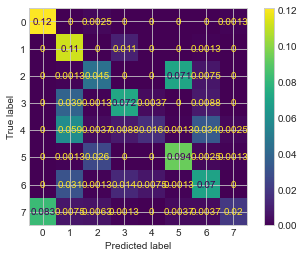

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
# cmd = ConfusionMatrixDisplay(cm, display_labels=['business','health'])
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.savefig('cmd2.png')

In [45]:
#import classification_report
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   b'AM-DSB'       0.60      0.97      0.74       100
   b'AM-SSB'       0.45      0.90      0.60       100
     b'BPSK'       0.52      0.36      0.43       100
    b'CPFSK'       0.67      0.58      0.62       100
     b'GFSK'       0.59      0.13      0.21       100
     b'PAM4'       0.55      0.75      0.63       100
     b'QPSK'       0.55      0.56      0.55       100
     b'WBFM'       0.80      0.16      0.27       100

    accuracy                           0.55       800
   macro avg       0.59      0.55      0.51       800
weighted avg       0.59      0.55      0.51       800



In [223]:
import pandas as pd
data = [[-20, 12.2], [-18,11],[-16,11.3],[-14,14],[-12,14.8],[-10,15.6],[-8,17.2],[-6,21.2],[-4,27.1],[-2,34.5],[0,31.1],[2,39.2],[4,43.7],[6,47.5],[8,48.2],[10,47.6],[12,48.2],[14,51.7],[16,55.1],[18,55.1]]
pd.DataFrame(data, columns=["SNR", "Accuracy"])

,SNR,Accuracy
0,-20,12.2
1,-18,11.0
2,-16,11.3
3,-14,14.0
4,-12,14.8
5,-10,15.6
6,-8,17.2
7,-6,21.2
8,-4,27.1
9,-2,34.5


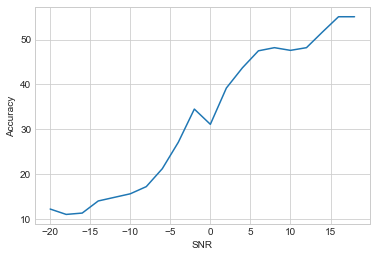

In [2]:
Accuracy = [12.2,11,11.3,14,14.8,15.6,17.2,21.2,27.1,34.5,31.1,39.2,43.7,47.5,48.2,47.6,48.2,51.7,55.1,55.1]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]

plt.plot(SNR,Accuracy)
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('12.png')

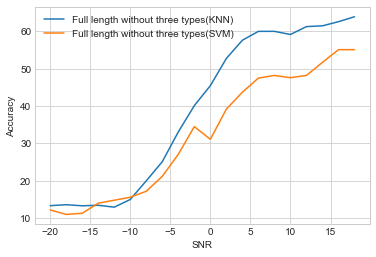

In [3]:
Accuracy = [13.34,13.6,13.31,13.45,12.94,15,20,25.12,33.097,40.125,45.47,52.76,57.625,60,60,59.16,61.27,61.48,62.59,63.91]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]

Accuracy1 = [12.2,11,11.3,14,14.8,15.6,17.2,21.2,27.1,34.5,31.1,39.2,43.7,47.5,48.2,47.6,48.2,51.7,55.1,55.1]
SNR1 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]

plt.plot(SNR,Accuracy,label='Full length without three types(KNN)')
plt.plot(SNR1,Accuracy1,label='Full length without three types(SVM)')
plt.legend()
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('n.png')

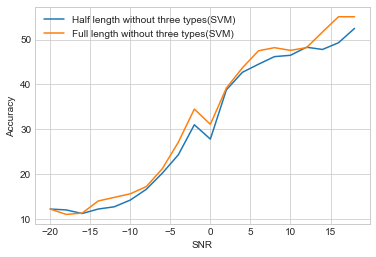

In [8]:
Accuracy1 = [12.2,11,11.3,14,14.8,15.6,17.2,21.2,27.1,34.5,31.1,39.2,43.7,47.5,48.2,47.6,48.2,51.7,55.1,55.1]
SNR1 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]
Accuracy = [12.2,12,11.2,12.2,12.7,14.2,16.6,20.2,24.3,31,27.8,38.8,42.7,44.5,46.2,46.5,48.3,47.8,49.3,52.5]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]


plt.plot(SNR,Accuracy,label='Half length without three types(SVM)')
plt.plot(SNR1,Accuracy1,label='Full length without three types(SVM)')

plt.legend()
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('1sl.png')


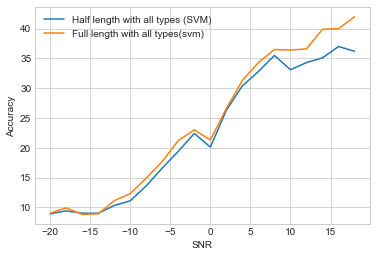

In [9]:
Accuracy1 = [9,9.9,8.8,8.9,11.1,12.3,14.9,17.7,21.2,23,21.3,26.6,31.3,34.3,36.5,36.4,36.6,39.9,40,42]
SNR1 = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]
Accuracy = [8.9,9.4,9,9,10.3,11.1,13.6,16.6,19.4,22.4,20.1,26.3,30.4,32.8,35.5,33.1,34.3,35.1,37,36.2]
SNR = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]

plt.plot(SNR,Accuracy,label='Half length with all types (SVM)')
plt.plot(SNR1,Accuracy1,label='Full length with all types(svm)')

plt.legend()
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.savefig('2sl.png')

